In [1]:
"""Python Standard Library"""
import os
import logging

"""3rd Party Imports"""

import zipfile
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import fnmatch

In [2]:
# Keep this and uncomment if necessary. This will extract any output files if they are downloaded in a zipfile
# Remember to change the folder of the output files accordingly!
#with zipfile.ZipFile('./insert_output_file_folder.zip', 'r') as zip_ref:
    #zip_ref.extractall('./')

In [3]:
# Scenario Param List: Here, we manually input each *individual* scenario parameter we are modeling, so we can
# keep track of this for plotting later. Note: scenario combinations are not needed.
# For now, this is a bit tedious, but until another method is found, it is necessary for later steps.

# Format: sn = '*portion of filename specifying this parameter*'
# Note: If you have values like 1.0 and 1.05, without _ after 1.0, the pattern finder 
# later on will lump 1.0 and 1.05 together.

s1 = '*hosp_frac_0.7*'
s1_val = 0.7

s2 = '*hosp_frac_0.8*'
s2_val = 0.8

s3 = '*hosp_frac_0.9*'
s3_val = 0.9

s4 = '*school_contact_increase_1.0*' 
s4_val = 1.0 

s5 = '*school_contact_increase_1.1*' 
s5_val = 1.1

s6 = '*school_contact_increase_1.2*'
s6_val = 1.2

s7 = '*beta_mult_0.95*'
s7_val = 0.95

s8 = '*beta_mult_1.0_*'
s8_val = 1.0

s9 = '*beta_mult_1.05*'
s9_val = 1.05


# This splits up scenarios into what parameters they're modifying
# i.e. the beta_mult parameter has 2 different scenarios

param_names = ['hosp_frac','school_contact_increase', 'beta_mult']

params1 = [s1, s2, s3]
params1_vals = [s1_val, s2_val, s3_val]

params2 = [s4, s5, s6]
params2_vals = [s4_val, s5_val, s6_val]

params3 = [s7, s8, s9]
params3_vals = [s7_val, s8_val, s9_val]

In [4]:
results_dir = "./20220816_Model_Outputs"
forecasts = []
pattern = '*model_forecast.csv'

In [5]:
# Getting directories for each forecast .csv file while ignoring other scenario file outputs in folder
forecasts = [os.path.join(results_dir, file) for file in os.listdir(results_dir) if fnmatch.fnmatch(file, pattern)]

In [6]:
scenarios = []

# Keeps track of what index we're on for a given parameter in our parameter lists, paramsn
p1_count = 0
p2_count = 0
p3_count = 0

# Keeps track of what file number we're on in our forecast list
file_num = 0

for param1 in params1:
    #print('\n','p1', p1_count)
    for param2 in params2:
        #print('p2', p2_count)
        for param3 in params3:
            #print('p3', p3_count)
        #for paramn in paramsn:  *** tab next line
            for file in forecasts:
            # going through each file and checking for file that has scenario combination:
            # param1,param2,...,paramn
                if fnmatch.fnmatch(file, param1) and fnmatch.fnmatch(file, param2) and fnmatch.fnmatch(file, param3):
                #and fnmatch.fnmatch(file, paramn):
                    # turn that file into a dataframe and add that dataframe into a list called 'scenarios' 
                    scenarios.append(pd.read_csv(file))
                    # in the data frame, insert a column for each scenario parameter and give it the parameter value
                    scenarios[file_num].insert(0, param_names[0], params1_vals[p1_count])
                    scenarios[file_num].insert(0, param_names[1], params2_vals[p2_count])
                    scenarios[file_num].insert(0, param_names[2], params3_vals[p3_count])
                    #scenarios[z].inser(0, param_names[n], paramsn_vals[_])
                    file_num = file_num+1
                    #print(file_num)
            
            p3_count = p3_count+1
        p2_count = p2_count+1
        p3_count = 0
    p1_count = p1_count+1
    p2_count = 0
    
# ***** Note: Commented out print functions are very useful for debugging! If you find your list of scenarios
# has too few files in it, you can figure out which files are being skipped with the help of these print functions.

In [7]:
# Here, we combine all of the dataframes into one larger dataframe.
# This is okay, because each hospitalization value has a corresponding parameters value to ID it!
# However, if you wish to look at individual dataframes, you can still call on scenarios.

all_scenarios = pd.concat(scenarios,ignore_index=True)

In [8]:
# We get rid of the non-observed values for given and modeled data since we're not plotting it.
# If you would like to plot it, simply comment out this line
# (and add column names to 'value_vars' argument in .melt() function below if creating a relplot)

all_scenarios = all_scenarios.drop(['modeled_actual', 'estimated_actual'], axis=1)
all_scenarios.head(100)
#print(len(all_scenarios))

,beta_mult,school_contact_increase,hosp_frac,date,observed,modeled_observed
0,0.95,1.0,0.7,2020-01-24,0.000000,0.000000
1,0.95,1.0,0.7,2020-01-25,0.000000,0.000888
2,0.95,1.0,0.7,2020-01-26,0.000000,0.006040
3,0.95,1.0,0.7,2020-01-27,0.000000,0.017465
4,0.95,1.0,0.7,2020-01-28,0.000000,0.035702
...,...,...,...,...,...,...
95,0.95,1.0,0.7,2020-04-28,782.350000,758.600015
96,0.95,1.0,0.7,2020-04-29,781.000000,743.956277
97,0.95,1.0,0.7,2020-04-30,750.700000,729.192848
98,0.95,1.0,0.7,2020-05-01,737.400000,714.358528


In [9]:
# This creates a list of every unique date included in all_scenario dataframe
all_dates = all_scenarios['date'].drop_duplicates()#

In [20]:
s1_scenarios = pd.DataFrame()
s2_scenarios = pd.DataFrame()
s3_scenarios = pd.DataFrame()
#s1_scenarios['beta_mult'] = [all_scenarios['beta_mult']]
#s1_scenarios['school_contact_increase'] = [all_scenarios['school_contact_increase'][i] for i in range(len(all_scenarios))]
#s1_scenarios['date'] = [all_scenarios['date']]
s1_scenarios['modeled_hf_0.7'] = [all_scenarios['modeled_observed'][i] for i in range(len(all_scenarios)) if all_scenarios['hosp_frac'][i] == 0.7]
s2_scenarios['modeled_hf_0.8'] = [all_scenarios['modeled_observed'][i] for i in range(len(all_scenarios)) if all_scenarios['hosp_frac'][i] == 0.8]
s3_scenarios['modeled_hf_0.9'] = [all_scenarios['modeled_observed'][i] for i in range(len(all_scenarios)) if all_scenarios['hosp_frac'][i] == 0.9]
#s1_scenarios['estimated_actual'] = [all_scenarios['estimated_actual'][i] for i in range(len(all_scenarios))]


#### The below portion of code is used for plotting different scenarios for one parameter, while other parameters are kept constant on a single scenario

In [16]:
# We create a df for all values of parameter_n where the other parameters 
# (in this case, beta_mult and school_contact_increase) are set at one value (i.e. 1.0 and 1.1, respectively)
param1_df = all_scenarios[all_scenarios.beta_mult == s8_val]
param1_df = param1_df[param1_df.school_contact_increase == s5_val]
param1_df.head()

,beta_mult,school_contact_increase,hosp_frac,date,observed,modeled_observed
3984,1.0,1.1,0.7,2020-01-24,0.0,0.000000
3985,1.0,1.1,0.7,2020-01-25,0.0,0.000888
3986,1.0,1.1,0.7,2020-01-26,0.0,0.006040
3987,1.0,1.1,0.7,2020-01-27,0.0,0.017465
3988,1.0,1.1,0.7,2020-01-28,0.0,0.035702


In [17]:
#Same as above, but with the next parameter
param2_df = all_scenarios[all_scenarios.beta_mult == s8_val]
param2_df = param2_df[param2_df.hosp_frac == s2_val]
param2_df.head()

,beta_mult,school_contact_increase,hosp_frac,date,observed,modeled_observed
9960,1.0,1.0,0.8,2020-01-24,0.0,0.000000
9961,1.0,1.0,0.8,2020-01-25,0.0,0.000888
9962,1.0,1.0,0.8,2020-01-26,0.0,0.006040
9963,1.0,1.0,0.8,2020-01-27,0.0,0.017465
9964,1.0,1.0,0.8,2020-01-28,0.0,0.035702


In [18]:
#Again, the same but with the final parameter
param3_df = all_scenarios[all_scenarios.hosp_frac == s2_val]
param3_df = param3_df[param3_df.school_contact_increase == s5_val]
param3_df.head(30)

,beta_mult,school_contact_increase,hosp_frac,date,observed,modeled_observed
11952,0.95,1.1,0.8,2020-01-24,0.0,0.000000
11953,0.95,1.1,0.8,2020-01-25,0.0,0.000888
11954,0.95,1.1,0.8,2020-01-26,0.0,0.006040
11955,0.95,1.1,0.8,2020-01-27,0.0,0.017465
11956,0.95,1.1,0.8,2020-01-28,0.0,0.035702
11957,0.95,1.1,0.8,2020-01-29,0.0,0.060501
11958,0.95,1.1,0.8,2020-01-30,0.0,0.091219
11959,0.95,1.1,0.8,2020-01-31,0.0,0.126361
11960,0.95,1.1,0.8,2020-02-01,0.0,0.161813
11961,0.95,1.1,0.8,2020-02-02,0.0,0.194522


#### Now, for sensitivity studies, we may want to distinguish scenario values that are part of the sensitivity analysis and the value that is considered our main, assumed value. In this particualar run, we want this for plotting our hospital reporting fraction scenarios and our different beta multiplier values. Thus, the code below creates a label for every data entry (row) that tells us if it is part of the sensitivity study or considered a data point in our main projection.

In [19]:
# Defines label as 'main' if our scenario is the parameter's main value or 'sensitivity' 
# if it is any other scenario value
def label_sens (row):
    if row['hosp_frac'] == 0.8:
        return 'main'
    else:
        return 'sensitivity'

In [20]:
# Creates label column in the paramn_df and applys label to each entry
param1_df['sens_label'] = param1_df.apply (lambda row: label_sens(row), axis=1)

In [21]:
# Same as above, but for different parameter and its scenarios
def label_sens (row):
    if row['beta_mult'] == 1.0:
        return 'main'
    else:
        return 'sensitivity'

In [22]:
param3_df['sens_label'] = param3_df.apply (lambda row: label_sens(row), axis=1)

# **** Start of code to potentially delete ****

In [307]:
#print(bm_new['sens_label'][7000],bm_new['beta_mult'][7000] )

In [167]:
bm_1_df = bm_new[bm_new.beta_mult == 0.95]
bm_2_df = bm_new[bm_new.beta_mult == 1.0]
bm_3_df = bm_new[bm_new.beta_mult == 1.05]

In [168]:
bm_2_df = bm_2_df.reset_index(drop=True)
bm_3_df = bm_3_df.reset_index(drop=True)

In [169]:
bm_1_df = bm_1_df.rename(columns={'modeled_observed':'modeled_bm_0.95'})

bm_1_df['modeled_bm_1.0'] = bm_2_df['modeled_observed']#.values()
bm_1_df['modeled_bm_1.05'] = bm_3_df['modeled_observed']#.values()

bm_1_df.drop(columns=['hosp_frac'])

,beta_mult,school_contact_increase,date,observed,modeled_bm_0.95,sens_label,modeled_bm_1.0,modeled_bm_1.05
0,0.95,1.1,2020-01-24,0.0,0.000000,sensitivity,0.000000,0.000000
1,0.95,1.1,2020-01-25,0.0,0.000888,sensitivity,0.000888,0.000888
2,0.95,1.1,2020-01-26,0.0,0.006040,sensitivity,0.006040,0.006040
3,0.95,1.1,2020-01-27,0.0,0.017465,sensitivity,0.017465,0.017465
4,0.95,1.1,2020-01-28,0.0,0.035702,sensitivity,0.035702,0.035702
...,...,...,...,...,...,...,...,...
12982,0.95,1.1,2022-10-14,NaN,152.785223,sensitivity,NaN,NaN
12983,0.95,1.1,2022-10-15,NaN,150.668766,sensitivity,NaN,NaN
12984,0.95,1.1,2022-10-16,NaN,148.573211,sensitivity,NaN,NaN
12985,0.95,1.1,2022-10-17,NaN,146.499389,sensitivity,NaN,NaN


In [170]:
print(len(bm_new))

8991


In [171]:
hf_df = all_scenarios[all_scenarios.hosp_frac == 0.7]
s2_df = all_scenarios[all_scenarios.hosp_frac == 0.8]
s3_df = all_scenarios[all_scenarios.hosp_frac == 0.9]


In [172]:
hf_df.head(5000)

,beta_mult,school_contact_increase,hosp_frac,date,observed,modeled_observed
0,0.95,1.1,0.7,2020-01-24,0.0,0.000000
1,0.95,1.1,0.7,2020-01-25,0.0,0.000888
2,0.95,1.1,0.7,2020-01-26,0.0,0.006040
3,0.95,1.1,0.7,2020-01-27,0.0,0.017465
4,0.95,1.1,0.7,2020-01-28,0.0,0.035702
...,...,...,...,...,...,...
4995,1.05,1.2,0.7,2020-01-24,0.0,0.000000
4996,1.05,1.2,0.7,2020-01-25,0.0,0.000888
4997,1.05,1.2,0.7,2020-01-26,0.0,0.006040
4998,1.05,1.2,0.7,2020-01-27,0.0,0.017465


In [173]:
s3_df.head(50)
s2_df = s2_df.reset_index(drop=True)
s3_df = s3_df.reset_index(drop=True)

In [174]:
s3_df.head(5000)

,beta_mult,school_contact_increase,hosp_frac,date,observed,modeled_observed
0,0.95,1.1,0.9,2020-01-24,0.0,0.000000
1,0.95,1.1,0.9,2020-01-25,0.0,0.000888
2,0.95,1.1,0.9,2020-01-26,0.0,0.006040
3,0.95,1.1,0.9,2020-01-27,0.0,0.017465
4,0.95,1.1,0.9,2020-01-28,0.0,0.035702
...,...,...,...,...,...,...
4995,1.05,1.2,0.9,2020-01-24,0.0,0.000000
4996,1.05,1.2,0.9,2020-01-25,0.0,0.000888
4997,1.05,1.2,0.9,2020-01-26,0.0,0.006040
4998,1.05,1.2,0.9,2020-01-27,0.0,0.017465


In [175]:
hf_df['observed'].equals(s2_df['observed'])

True

In [176]:
hf_df = hf_df.rename(columns={'modeled_observed':'modeled_hf_0.7'})
#s2_df = s2_df.rename(columns={'modeled_actual':'modeled_hf_0.8'})
#s3_df.rename(columns={'modeled_actual':'modeled_hf_0.9'})

In [177]:
s2_df.head()

,beta_mult,school_contact_increase,hosp_frac,date,observed,modeled_observed
0,0.95,1.1,0.8,2020-01-24,0.0,0.000000
1,0.95,1.1,0.8,2020-01-25,0.0,0.000888
2,0.95,1.1,0.8,2020-01-26,0.0,0.006040
3,0.95,1.1,0.8,2020-01-27,0.0,0.017465
4,0.95,1.1,0.8,2020-01-28,0.0,0.035702


In [178]:
hf_df['modeled_hf_0.8'] = s2_df['modeled_observed']#.values()
hf_df['modeled_hf_0.9'] = s3_df['modeled_observed']#.values()

In [179]:
hf_df.drop(columns=['hosp_frac'])

,beta_mult,school_contact_increase,date,observed,modeled_hf_0.7,modeled_hf_0.8,modeled_hf_0.9
0,0.95,1.1,2020-01-24,0.0,0.000000,0.000000,0.000000
1,0.95,1.1,2020-01-25,0.0,0.000888,0.000888,0.000888
2,0.95,1.1,2020-01-26,0.0,0.006040,0.006040,0.006040
3,0.95,1.1,2020-01-27,0.0,0.017465,0.017465,0.017465
4,0.95,1.1,2020-01-28,0.0,0.035702,0.035702,0.035702
...,...,...,...,...,...,...,...
5989,1.05,1.2,2022-10-14,NaN,79.429739,104.123296,129.941002
5990,1.05,1.2,2022-10-15,NaN,77.737601,102.074348,127.613636
5991,1.05,1.2,2022-10-16,NaN,76.086648,100.063570,125.316651
5992,1.05,1.2,2022-10-17,NaN,74.476347,98.091075,123.050887


In [180]:
hf_df.head()

,beta_mult,school_contact_increase,hosp_frac,date,observed,modeled_hf_0.7,modeled_hf_0.8,modeled_hf_0.9
0,0.95,1.1,0.7,2020-01-24,0.0,0.000000,0.000000,0.000000
1,0.95,1.1,0.7,2020-01-25,0.0,0.000888,0.000888,0.000888
2,0.95,1.1,0.7,2020-01-26,0.0,0.006040,0.006040,0.006040
3,0.95,1.1,0.7,2020-01-27,0.0,0.017465,0.017465,0.017465
4,0.95,1.1,0.7,2020-01-28,0.0,0.035702,0.035702,0.035702


In [50]:
# *****Note: Have to add in param_names[n] for any additional for all n in range len(param_names)

all_scenarios2 = pd.melt(all_scenarios,id_vars=['date',param_names[0], param_names[1],param_names[2]], value_vars=['modeled_observed','observed'], var_name='cols', value_name='hosp')





In [51]:
all_scenarios2.head()

,date,hosp_frac,school_contact_increase,beta_mult,cols,hosp
0,2020-01-24,0.7,1.1,0.95,modeled_observed,0.000000
1,2020-01-25,0.7,1.1,0.95,modeled_observed,0.000888
2,2020-01-26,0.7,1.1,0.95,modeled_observed,0.006040
3,2020-01-27,0.7,1.1,0.95,modeled_observed,0.017465
4,2020-01-28,0.7,1.1,0.95,modeled_observed,0.035702


# **** End of code to potentially delete ****

In [24]:
# This sets the overall style of your plots
# For example, 'darkgrid' gives you a grey, gridded background
# and 'paper' makes the features of the graphs less bold and more suited for print
sns.set_style('darkgrid')
sns.set_context("paper")

In [25]:
# Here, I set which dates I want to be put on the x-axis (treated like tick marks)
# Along with the label which is what I want the final plot to actually say
# i.e. dates[0] = '2022-05-01' but will read "May 2022" on the plot figure

dates = ['2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01','2022-10-01',]
labels = ["May\n2022", "June\n2022", "July\n2022", "August\n2022", "September\n2022", "October\n2022"]

# I also manually set legend labels for each plot, and for code organization it is easy to do in one go up here 
hf_legend_texts=['Hospital Reporting Fraction', 'Sensitivity (+/- 10%)', 'Main (80%)' ]
bm_legend_texts=['BA.5 Transmissibility', 'Sensitivity (+/- 5%)', 'Main' ]
sci_legend_texts = ['No Increase','10% Increase', '20% Increase']

In [26]:
# Create an array with the colors you want to use for each plot
# For sensitivity studies, you need to assign a color to each scenarion being plotted 
# even if they will all be the same color

colors = ["steelblue", "steelblue", "steelblue"]
colors2 = ["seagreen", "seagreen", "seagreen"]
colors3 = ['peru', 'cadetblue', 'olivedrab']

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

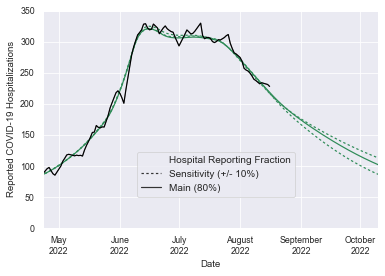

In [27]:
# Plots scenarios
plot1 = sns.lineplot(data=param1_df, x='date', y='modeled_observed',hue='hosp_frac',style='sens_label',dashes=[(2,2),''], ci=None,palette=colors2)
# Plots observed data
plot1_obs = sns.lineplot(data=param1_df, x='date', y='observed', color='black')

# Defines axes and titles
plot1.set(xlim=(820, 990), ylim=(0,350), xticks=dates)
plot1.set(xlabel='Date', ylabel='Reported COVID-19 Hospitalizations')
plot1.set_xticklabels(labels)

# Defines legend text and location
h,l = plot1.get_legend_handles_labels()
l=hf_legend_texts
plot1.legend(h[4:7],l[0:3],bbox_to_anchor=(.28, .35), loc=2, borderaxespad=0., fontsize=10)

# Saves figure with desired customizations
# bbox_inches = "tight" keeps any part of the plot from being cut off when saved as a figure
plot1.get_figure().savefig("hf_scenarios.png", dpi=300, bbox_inches = "tight")

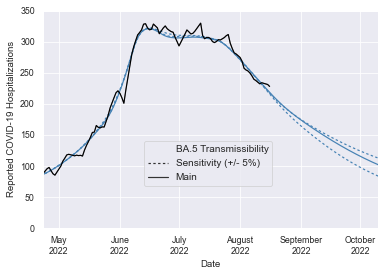

In [31]:
# Plotting
plot2 = sns.lineplot(data=param3_df, x='date', y='modeled_observed', hue='beta_mult', style='sens_label',dashes=[(2,2),''], ci=None,palette=colors)
plot2_obs = sns.lineplot(data=param3_df, x='date', y='observed', color='black')

# Axes customization
plot2.set(xlim=(820, 990), ylim=(0,350), xticks=dates)
plot2.set(xlabel='Date', ylabel='Reported COVID-19 Hospitalizations')
plot2.set_xticklabels(labels)

# Legend customization
h,l = plot2.get_legend_handles_labels()
l=bm_legend_texts
plot2.legend(h[4:7],l[0:3],bbox_to_anchor=(.3, .4), loc=2, borderaxespad=0., fontsize=10)

# Save plot is figure
plot2.get_figure().savefig("bm_scenarios.png", dpi=300, bbox_inches = "tight")

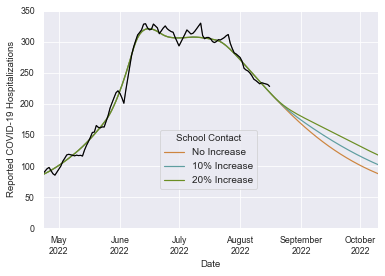

In [33]:
# Plotting
plot3 = sns.lineplot(data=param2_df, x='date', y='modeled_observed', hue='school_contact_increase', ci=None,palette=colors3)
plot3_obs = sns.lineplot(data=param2_df, x='date', y='observed', color='black')

# Axes customization
plot3.set(xlim=(820, 990), ylim=(0,350), xticks=dates)
plot3.set(xlabel='Date', ylabel='Reported COVID-19 Hospitalizations')
plot3.set_xticklabels(labels)

# Legend Customization
h,l = plot3.get_legend_handles_labels()
l=sci_legend_texts
plot3.legend(h,l,bbox_to_anchor=(.35, .45), loc=2, borderaxespad=0.,title='School Contact' ,fontsize=10)

# Save plot is figure
plot3.get_figure().savefig("sci_scenarios.png", dpi=300, bbox_inches = "tight")


### Below code could be used for making an sns.relplot() with grid type plot

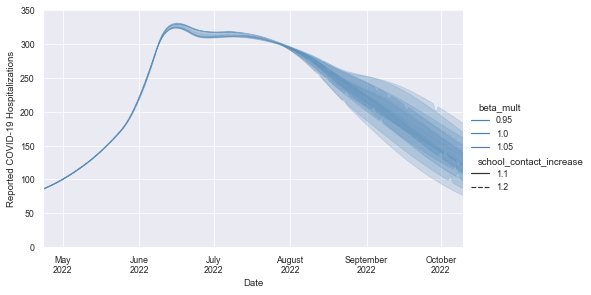

In [184]:
plotn = sns.relplot(data=all_scenarios, x='date', y='modeled_observed',kind='line',hue='beta_mult',style='school_contact_increase',palette=colors,alpha=0.1,height=4, aspect=1.7)
plotn.set(xlim=(820, 990), ylim=(0,350), xticks=dates)
plotn.set(xlabel='Date', ylabel='Reported COVID-19 Hospitalizations')
plotn.set_xticklabels(labels)


#ci=None to remove shading
#style = 'school_contact_increase' 

#for i in range(len(legend_texts)):
    #plot1._legend.texts[i].set_text(legend_texts[i])


#g._legend._legend_box.sep = -5 
#leg = plot1._legend
#plot1._legend.set_title()
#plot1.legend(title)